#### Yongjun Zhu's DVHW 1

In [65]:
pip install pyreadr

In [66]:
pip install plotly bokeh

In [67]:
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
file_path = "sample_data/HCMST_couples.rds"
result = pyreadr.read_r(file_path)
df = list(result.values())[0]
df.head()

/usr/local/lib/python3.11/dist-packages/pyreadr/_pyreadr_parser.py:283: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/pyreadr/_pyreadr_parser.py:283: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,met_through_as_nghbrs,met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed,meeting_type,value
0,11,2936569,Qualified,0.7752,60727.0,NaN,0.7708,60383.0,0.871588,60497.0,...,no,no,1.0,no,12.0,12.0,20.0,14.0,Primary or Secondary School,yes
1,28,1946291,Qualified,1.6552,129664.0,NaN,1.6457,128920.0,1.860887,129164.0,...,no,no,1.0,no,0.0,12.0,12.0,13.0,Primary or Secondary School,yes
2,37,2106585,Qualified,1.2118,94929.0,NaN,1.2048,94381.0,1.362336,94560.0,...,no,no,1.0,no,11.0,12.0,11.0,12.0,Primary or Secondary School,yes
3,38,2963787,Qualified,1.0422,81643.0,NaN,1.0362,81173.0,1.171690,81327.0,...,no,no,1.0,no,12.0,12.0,12.0,12.0,Primary or Secondary School,yes
4,42,2962195,Qualified,NaN,NaN,0.8783,NaN,NaN,0.272168,18891.0,...,no,no,1.0,yes,12.0,16.0,16.0,13.0,Primary or Secondary School,yes


1. Dating Trends Over Time
Visualize how the mode of meeting for the first time has changed over the years. Create two (2) charts in this section to highlight some important pattern(s).

Create an alternative visualization of the same data. Discuss which visualization you recommend to the editor and why. Rely on at least three specific data visualization principles or theories discussed in class to justify your choice.

Hint:
- The variables Q21A_Year and Q21A_Month contain the year and month when the respondent first met their partner.
- meeting_type contains 21 categories of how people have met for the first time. Simplify into fewer categories, for example: grade school, college, neighbors, bar, work, non-work, online.
- calculate the frequency of meeting type over time for visualization

In [68]:
df['Q21A_Year'].dtype

CategoricalDtype(categories=['1939', '1946', '1948', '1949', '1950', '1951', '1952',
                  '1953', '1954', '1955', '1956', '1957', '1958', '1959',
                  '1960', '1961', '1962', '1963', '1964', '1965', '1966',
                  '1967', '1968', '1969', '1970', '1971', '1972', '1973',
                  '1974', '1975', '1976', '1977', '1978', '1979', '1980',
                  '1981', '1982', '1983', '1984', '1985', '1986', '1987',
                  '1988', '1989', '1990', '1991', '1992', '1993', '1994',
                  '1995', '1996', '1997', '1998', '1999', '2000', '2001',
                  '2002', '2003', '2004', '2005', '2006', '2007', '2008',
                  '2009', '2010', '2011', '2012', '2013', '2014', '2015',
                  '2016', '2017', 'Refused'],
, ordered=False, categories_dtype=object)

<ipython-input-69-28103e6a8858>:23: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.

<ipython-input-69-28103e6a8858>:25: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



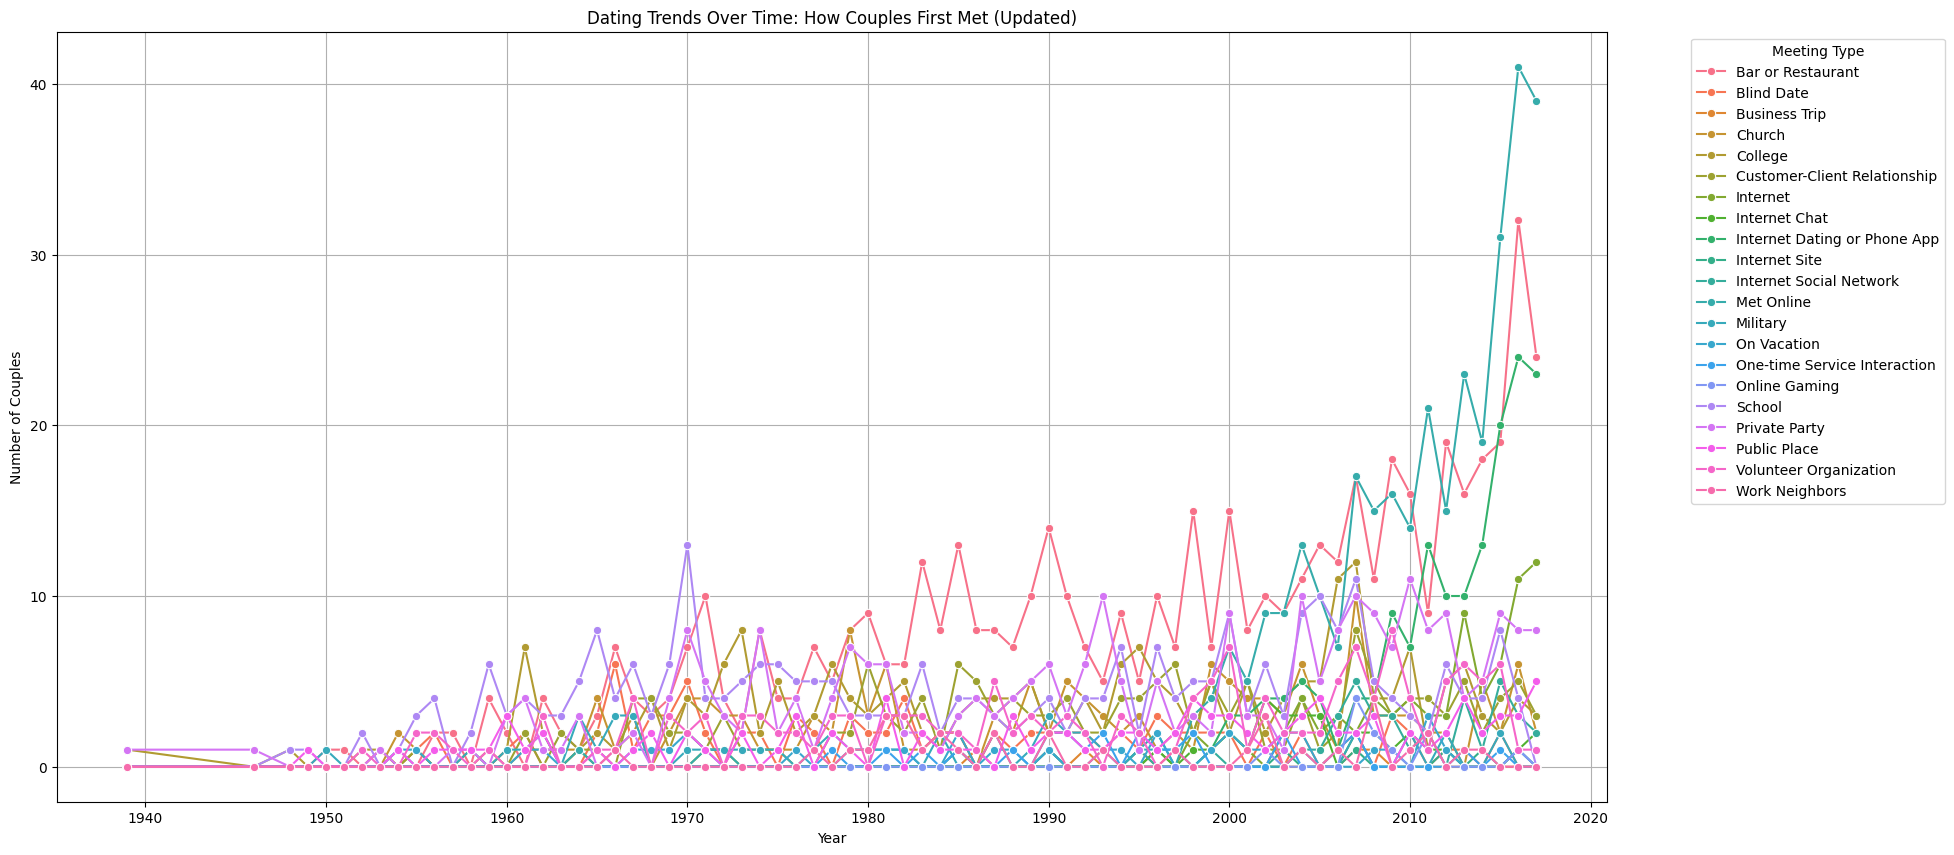

In [69]:
df_filtered = df[['Q21A_Year', 'meeting_type']].dropna()
df_filtered['Q21A_Year'] = df_filtered['Q21A_Year'].astype(str)

df_filtered = df_filtered[df_filtered['Q21A_Year'].str.isnumeric()]
df_filtered['Q21A_Year'] = df_filtered['Q21A_Year'].astype(int)

meeting_type_mapping = {
    'Primary or Secondary School': 'School',
    'College or University': 'College',
    'Through Friends': 'Friends',
    'Through Family': 'Family',
    'At a Bar or Restaurant': 'Bar',
    'Through Work': 'Work',
    'Through Religious Activities': 'Religious',
    'Through Online Dating Site': 'Online',
    'Through Social Media': 'Online',
    'At a Public Place': 'Public',
    'Through a Hobby or Interest Group': 'Activity Group',
    'As Neighbors': 'Neighbors',
    'Other': 'Other'
}

df_filtered['meeting_category'] = df_filtered['meeting_type'].replace(meeting_type_mapping)

meeting_trends = df_filtered.groupby(['Q21A_Year', 'meeting_category']).size().reset_index(name='count')

plt.figure(figsize=(20, 10))
sns.lineplot(data=meeting_trends, x='Q21A_Year', y='count', hue='meeting_category', marker='o')

plt.title('Dating Trends Over Time: How Couples First Met (Updated)')
plt.xlabel('Year')
plt.ylabel('Number of Couples')
plt.legend(title='Meeting Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


<Figure size 2000x1000 with 0 Axes>

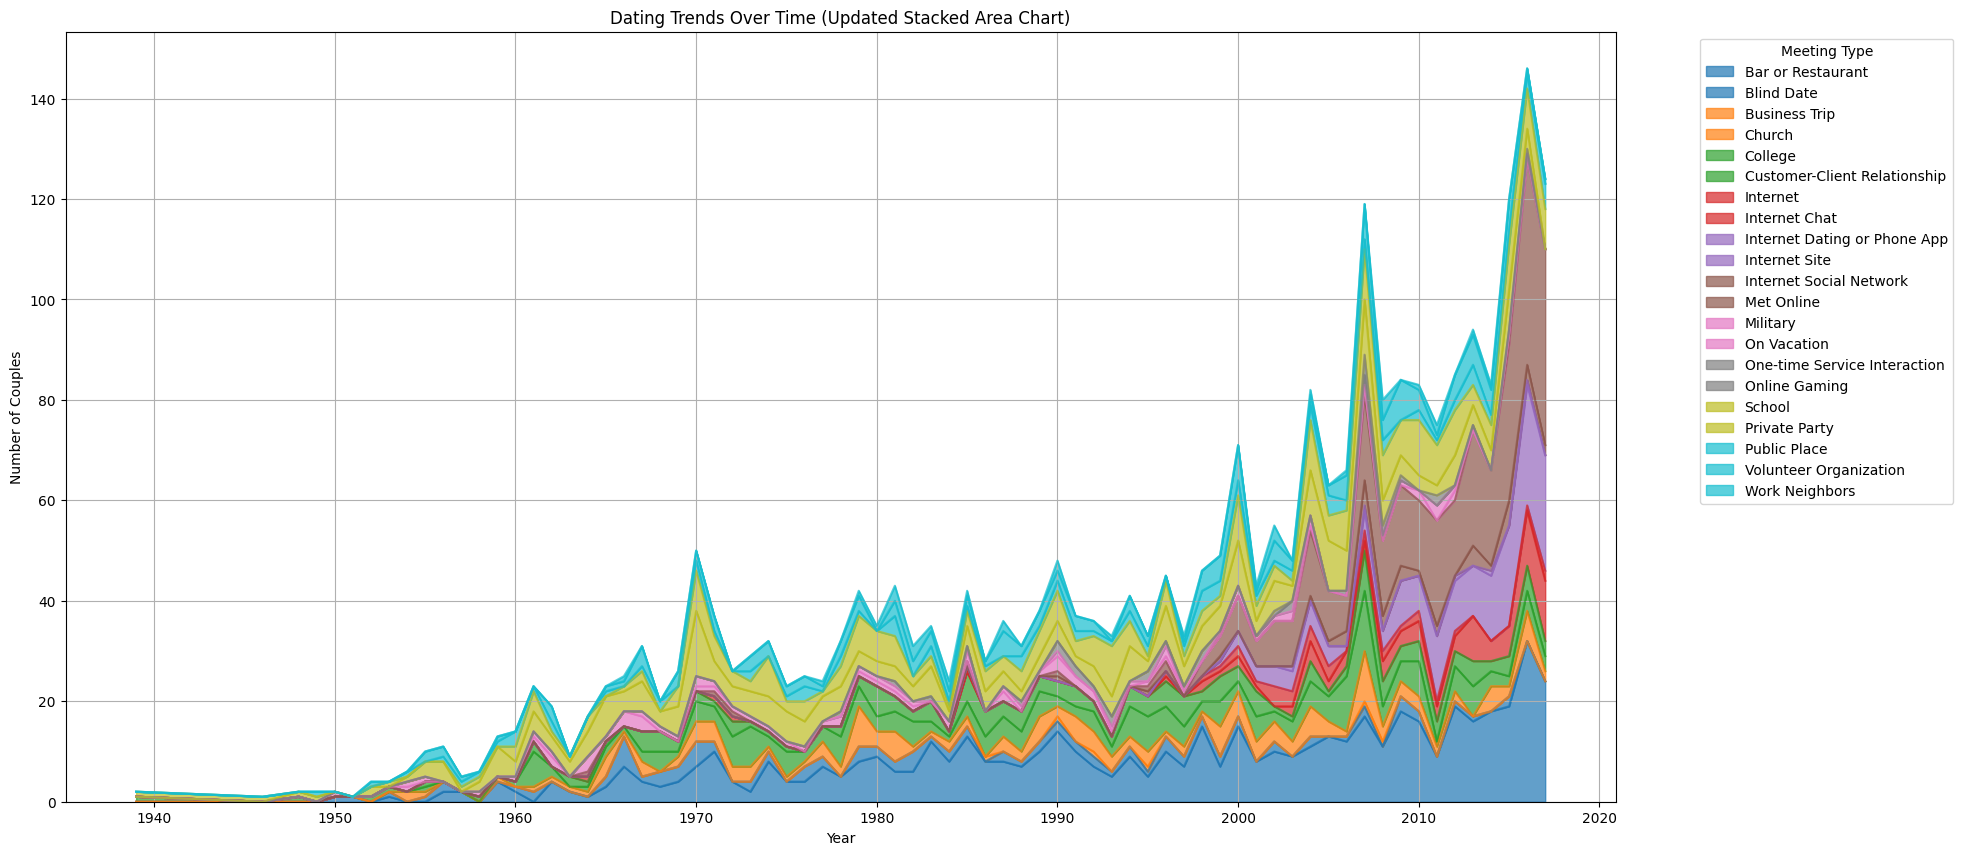

In [70]:
plt.figure(figsize=(20, 10))
pivot_table = meeting_trends.pivot(index="Q21A_Year", columns="meeting_category", values="count").fillna(0)

pivot_table.plot(kind='area', stacked=True, colormap='tab10', figsize=(20, 10), alpha=0.7)

plt.title("Dating Trends Over Time (Updated Stacked Area Chart)")
plt.xlabel("Year")
plt.ylabel("Number of Couples")
plt.legend(title="Meeting Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


For me, I think both graphs have their own strengths and weaknesses:

Line Chart (first chart)
Strengths: Clearly shows the trends of each meeting type over time.

Weaknesses: Overlapping lines make it difficult to see the relative importance of each method, and since the number of meeting type is large, it is even hard to find distinct colors for each meeting type which make the chart hard to read.

Stacked Area Chart (Second chart)
Strengths: Highlights relative proportions over time, making it easier to see when certain meeting types became more or less common. In general, it fulfills three prinicples:
Pre_attentive Processing, Gestalt Principles, and Edward Tufte's Data-Ink Ratio

Weaknesses: Less effective at showing the exact frequency of each meeting method.

Overall, I recommend the stacked area chart.

2. Age is Just a Number

(a)Create one (1) visualization to show the relationship between a respondent’s age and their partner’s age, accounting for the gender of the respondent? Identify the main pattern in the graph via an annotation directly added to the plot. Hint: ppage is the survey respondent’s age, Q9 captures the partner’s age, ppgender is the gender of the respondent.

(b)Use Edward Tufte’s principles to critique the plot above. Which of the changes would improve the plot in your opinion?

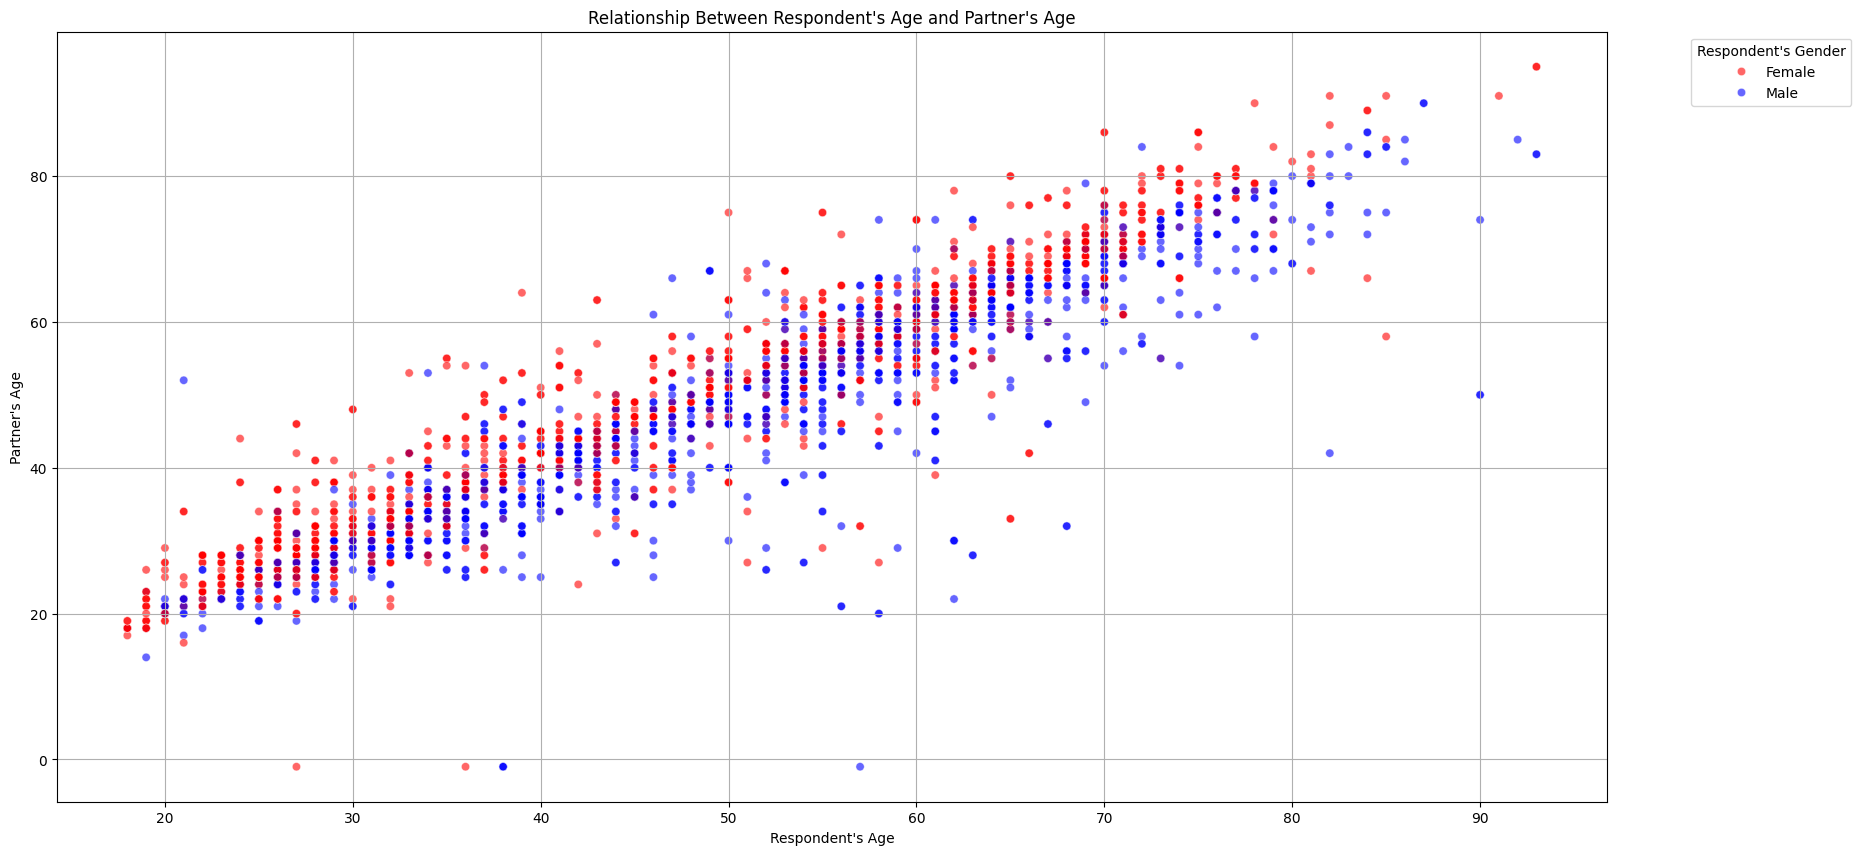

In [71]:
age_df = df[['ppage', 'Q9', 'ppgender']].dropna()
age_df['ppage'] = pd.to_numeric(age_df['ppage'], errors='coerce')
age_df['Q9'] = pd.to_numeric(age_df['Q9'], errors='coerce')
age_df = age_df.dropna()
gender_palette = {"Male": "blue", "Female": "red", "Other": "purple"}

plt.figure(figsize=(20, 10))
sns.scatterplot(data=age_df, x='ppage', y='Q9', hue='ppgender', alpha=0.6, palette=gender_palette)
plt.title("Relationship Between Respondent's Age and Partner's Age")
plt.xlabel("Respondent's Age")
plt.ylabel("Partner's Age")
plt.legend(title="Respondent's Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Strong Positive Correlation: Most couples have similar ages, forming a diagonal pattern.

Even thought the trend is obvious for us to observe, we can still include a linear line which reflects the trend, and we can see that the slope of the linear line would be positive and approach to 1 since most couples have similar ages.

3. Politics and Dating

Explore how the political affiliation of partners affects how couples meet and stay together. Create two (2) charts in this section. Make sure to use some variation in the type of visualizations. Discuss which visualization you recommend to your editor and why.

Write a short narrative (~150 words) based on your visualization, integrating data insights with a compelling story. This narrative should be suitable for a feature article, highlighting key findings and their implications.

Hint:
- The variable partyid7 contains the self reported political party affiliation of the survey respondent. The variable w6_q12 contains information about the partner’s political party affiliation.
- Consider using information about the length of the relationship (duration in days), information about ended relationship etc.

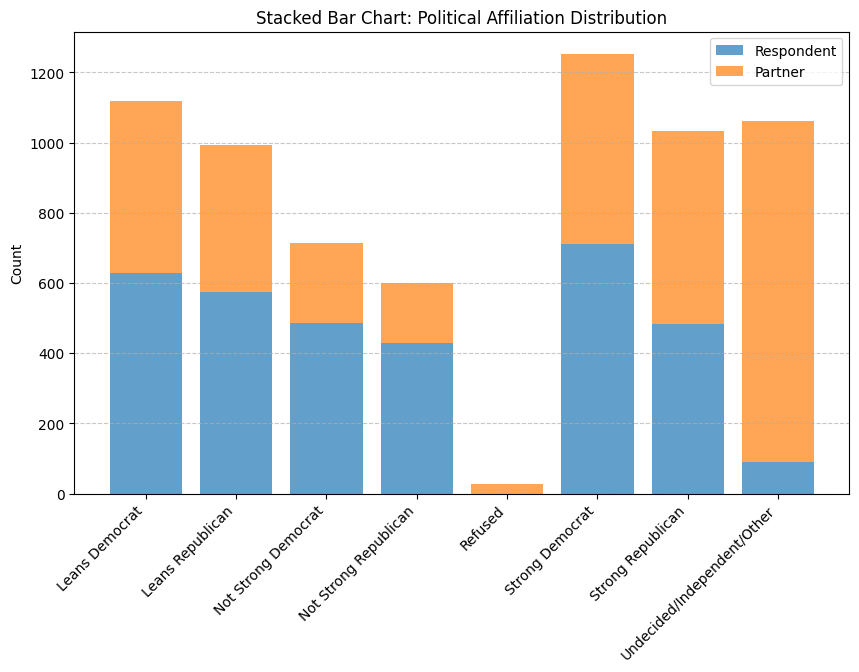

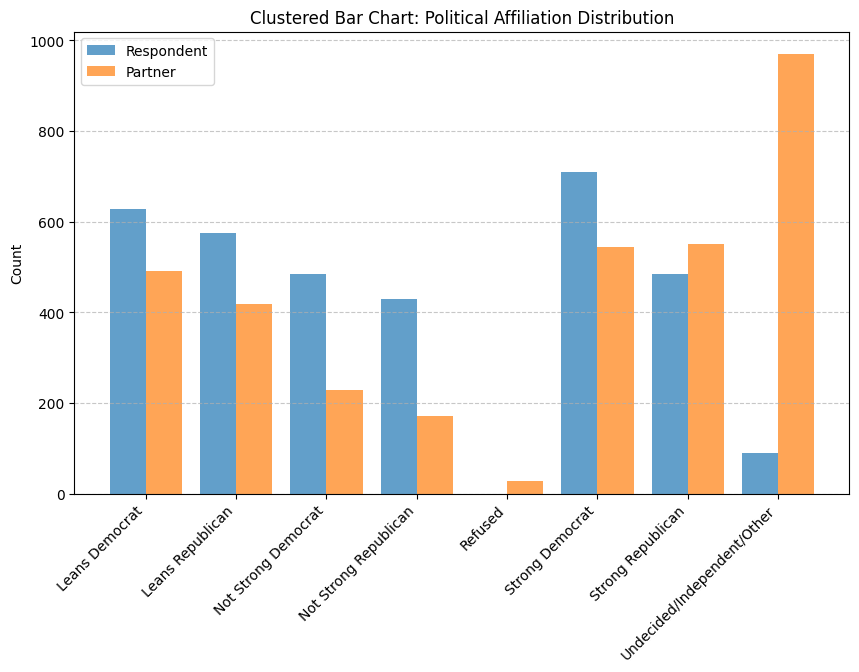

In [72]:
politics_bar_df = df[['partyid7', 'w6_q12']].dropna()

political_categories = [
    'Leans Democrat', 'Leans Republican', 'Not Strong Democrat', 'Not Strong Republican',
    'Refused', 'Strong Democrat', 'Strong Republican', 'Undecided/Independent/Other'
]

respondent_counts = politics_bar_df['partyid7'].value_counts().reindex(political_categories, fill_value=0)
partner_counts = politics_bar_df['w6_q12'].value_counts().reindex(political_categories, fill_value=0)

plt.figure(figsize=(10, 6))
plt.bar(respondent_counts.index, respondent_counts.values, label='Respondent', alpha=0.7)
plt.bar(partner_counts.index, partner_counts.values, bottom=respondent_counts.values, label='Partner', alpha=0.7)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Count")
plt.title("Stacked Bar Chart: Political Affiliation Distribution")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

x = np.arange(len(political_categories))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, respondent_counts.values, width, label='Respondent', alpha=0.7)
bars2 = ax.bar(x + width/2, partner_counts.values, width, label='Partner', alpha=0.7)

ax.set_xticks(x)
ax.set_xticklabels(political_categories, rotation=45, ha="right")
ax.set_ylabel("Count")
ax.set_title("Clustered Bar Chart: Political Affiliation Distribution")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Compare to the first Stacked Bar Chart, the second clustered bar chart can allow us to easily compare the party affiliation between family members.


#### Do Couples Align Their Political Party Affiliation or not in the U.S.


In an era of increasing political division, relationships often navigate the delicate balance between love and ideology. Our analysis of the How Couples Meet and Stay Together (HCMST) dataset reveals intriguing insights into the political alignment of romantic partners.

From our stacked and clustered bar charts, we find that political similarity is common but not universal. Strong Democrats tend to pair with fellow Democrats, and the same holds true for Strong Republicans. However, a significant number of couples bridge the partisan divide, particularly among those identifying as "Leans Democrat" or "Leans Republican."

Interestingly, the "Refused" category stands out, suggesting a reluctance to disclose political affiliation—possibly due to tensions within relationships or the broader climate of political polarization.









4. Your Turn to Choose

There are lots of other variables that could make for an interesting story, for example, educational background differences, relationship stages (First Met, Romantic, Live together & Married), regional patterns, relationship break ups, sexual behavior etc. Select some variables of your choice to tell a story that captures an interesting insight into the data.

Create one (1) chart in this section to highlight some important patterns. Briefly discuss which visualization you recommend to your editor, why you think the visualization is useful, and which patterns it serves to highlight.

<ipython-input-73-4b07c59d42ca>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




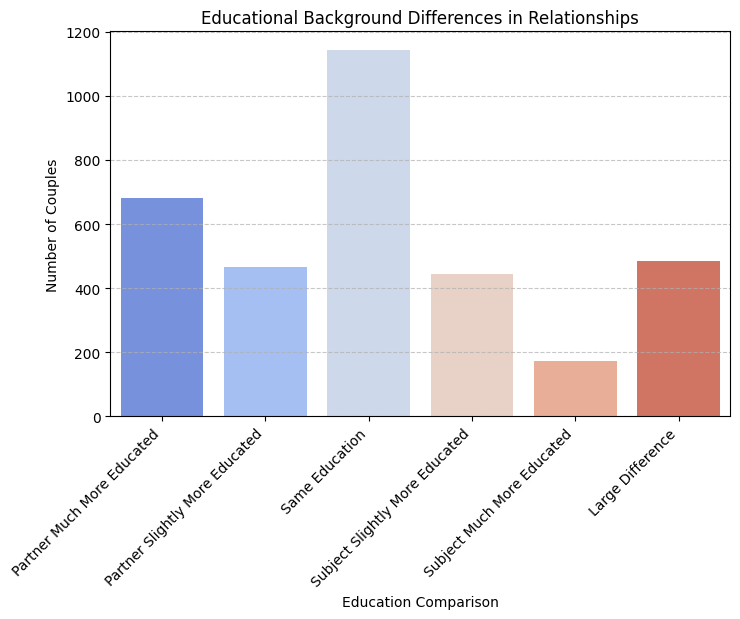

In [73]:
# Educational Background Differences in Relationship
education_df = df[['subject_yrsed', 'partner_yrsed', 'duration']].dropna()

education_df['subject_yrsed'] = pd.to_numeric(education_df['subject_yrsed'], errors='coerce')
education_df['partner_yrsed'] = pd.to_numeric(education_df['partner_yrsed'], errors='coerce')

education_df['education_gap'] = education_df['subject_yrsed'] - education_df['partner_yrsed']

education_df['education_match'] = pd.cut(
    education_df['education_gap'],
    bins=[-float('inf'), -2, -1, 0, 1, 2, float('inf')],
    labels=['Partner Much More Educated', 'Partner Slightly More Educated', 'Same Education',
            'Subject Slightly More Educated', 'Subject Much More Educated', 'Large Difference']
)

education_counts = education_df['education_match'].value_counts().reindex([
    'Partner Much More Educated', 'Partner Slightly More Educated', 'Same Education',
    'Subject Slightly More Educated', 'Subject Much More Educated', 'Large Difference'
], fill_value=0)

plt.figure(figsize=(8, 5))
sns.barplot(x=education_counts.index, y=education_counts.values, palette="coolwarm")

plt.title("Educational Background Differences in Relationships")
plt.xlabel("Education Comparison")
plt.ylabel("Number of Couples")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In this chart, I mainly focus on educational background differences in relationship. I change the data type to numerical and then find the difference of education by simply subtract and find the gap between members in family.

As I observed from the chart, most couples have similar levels of education. When differences exist, they tend to be small, with one partner slightly more educated rather than extreme mismatches. Large educational gaps are rare in relationship

5. Make Two Plots Interactive

Choose 2 of the plots you created above and add interactivity. For at least one of these interactive plots, this should not be done through the use of ggplotly

Briefly describe to the editor why interactivity in these visualizations is particularly helpful for a reader, referencing user engagement theories or interaction design principles.

In [74]:
fig1 = px.area(meeting_trends, x="Q21A_Year", y="count", color="meeting_category",
               title="Interactive Dating Trends Over Time",
               labels={"Q21A_Year": "Year", "count": "Number of Couples", "meeting_category": "Meeting Type"},
               template="plotly_white")
fig1.show()

fig2 = px.bar(x=education_counts.index, y=education_counts.values,
              title="Interactive Educational Background Differences",
              labels={"x": "Education Comparison", "y": "Number of Couples"},
              color=education_counts.index,
              template="plotly_white")
fig2.show()


Instead of being overwhelmed by all categories at one chart, users can toggle meeting types to focus on trends that interest them in the stacked area. What's more, by click on the bars of 'interactive educational background differences' chart, we can easily see the exact number counts of each category.

6. Data Table

To allow the reader to explore the survey data by themselves a bit, select a few useful variables, rename them appropriately for the table to be self-explanatory, and add an interactive data table to the output. Make sure the columns are clearly labeled. Select the appropriate options for the data table (e.g. search bar, sorting, column filters, in-line visualizations etc. – as far as the tools supplied in lecture allow).



In [75]:
data_table_df = df[['ppage', 'Q9', 'ppgender', 'partyid7', 'w6_q12', 'subject_yrsed', 'partner_yrsed', 'meeting_type']].dropna()
data_table_df = data_table_df.rename(columns={
    'ppage': 'Respondent Age',
    'Q9': 'Partner Age',
    'ppgender': 'Respondent Gender',
    'partyid7': 'Respondent Political Affiliation',
    'w6_q12': 'Partner Political Affiliation',
    'subject_yrsed': 'Respondent Education (Years)',
    'partner_yrsed': 'Partner Education (Years)',
    'meeting_type': 'How They Met'
})

fig = ff.create_table(data_table_df.head(20))
fig.show()
